In [1]:
import pandas as pd

In [2]:
df_identity = pd.read_csv('/Users/mpessini/Desktop/Ponderada_Marcelo/PonderadaSemana7/Data/train_identity.csv')
df_transaction = pd.read_csv('/Users/mpessini/Desktop/Ponderada_Marcelo/PonderadaSemana7/Data/train_transaction.csv')
df_sample = pd.read_csv('/Users/mpessini/Desktop/Ponderada_Marcelo/PonderadaSemana7/Data/sample_submission.csv')

In [3]:
df_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [4]:
df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_sample.head()

,TransactionID,isFraud
0,3663549,0.5
1,3663550,0.5
2,3663551,0.5
3,3663552,0.5
4,3663553,0.5


Merge nos dfs

In [6]:
# Merge the two dataframes on TransactionID
df_merged = df_transaction.merge(
    df_identity,
    on='TransactionID',
    how='left'   # or 'inner' if you only want rows present in both
)

# Check the result
print(df_merged.shape)
df_merged.head()


(590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [7]:
print(df_merged.shape)
print(df_merged.dtypes.value_counts())

# missing values (%)
missing = df_merged.isnull().mean().sort_values(ascending=False)
missing.head(20)

# target balance
df_merged['isFraud'].value_counts(normalize=True)

(590540, 434)
float64    399
object      31
int64        4
Name: count, dtype: int64


isFraud
0    0.96501
1    0.03499
Name: proportion, dtype: float64

In [8]:
num_cols = df_merged.select_dtypes(include='number').columns
df_merged[num_cols].describe().T.sort_values('mean').head(15)


,count,mean,std,min,25%,50%,75%,max
id_14,80044.0,-344.507146,93.695502,-660.0,-360.0,-300.0,-300.0,720.0
id_08,5155.0,-38.600388,26.084899,-100.0,-48.0,-34.0,-23.0,0.0
id_01,144233.0,-10.170502,14.347949,-100.0,-10.0,-5.0,-5.0,0.0
id_06,136865.0,-6.698710,16.491104,-100.0,-6.0,0.0,0.0,0.0
id_10,74926.0,-0.301124,2.789446,-100.0,0.0,0.0,0.0,0.0
id_04,66324.0,-0.058938,0.701015,-28.0,0.0,0.0,0.0,0.0
V68,513444.0,0.000534,0.023760,0.0,0.0,0.0,0.0,2.0
V27,514467.0,0.000776,0.028596,0.0,0.0,0.0,0.0,4.0
V28,514467.0,0.000830,0.031133,0.0,0.0,0.0,0.0,4.0
V89,501376.0,0.000902,0.031943,0.0,0.0,0.0,0.0,2.0


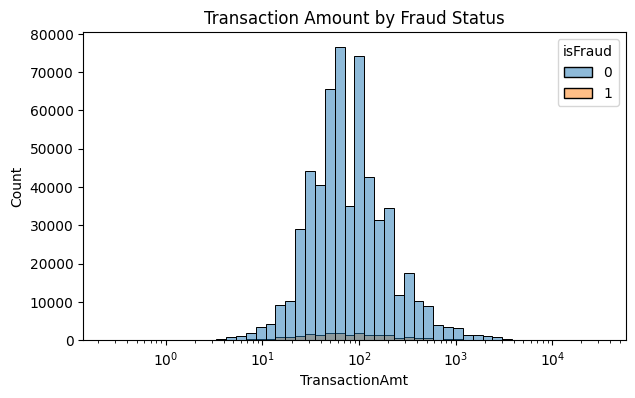

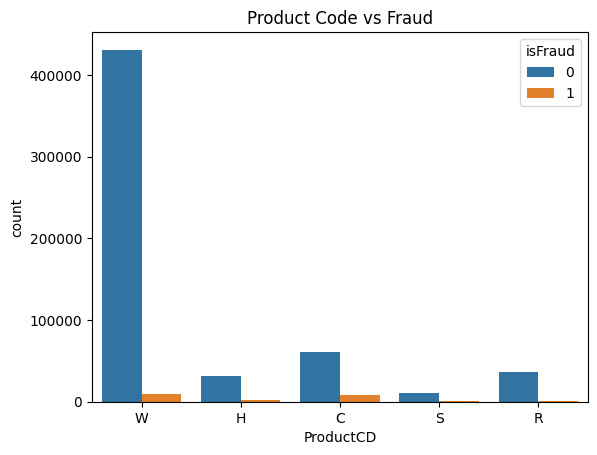

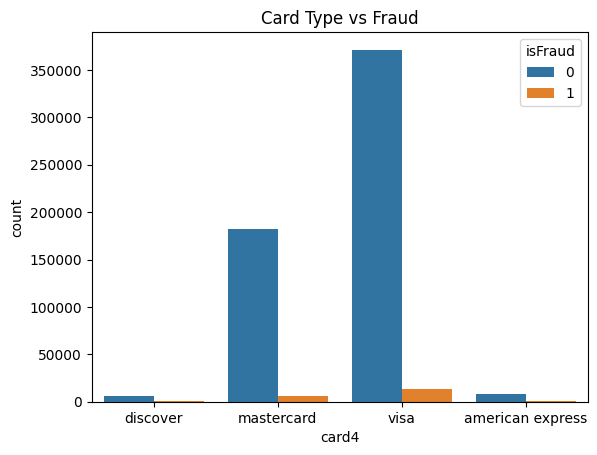

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.histplot(data=df_merged, x='TransactionAmt', hue='isFraud', log_scale=True, bins=50)
plt.title('Transaction Amount by Fraud Status')
plt.show()

sns.countplot(data=df_merged, x='ProductCD', hue='isFraud')
plt.title('Product Code vs Fraud')
plt.show()

sns.countplot(data=df_merged, x='card4', hue='isFraud')
plt.title('Card Type vs Fraud')
plt.show()


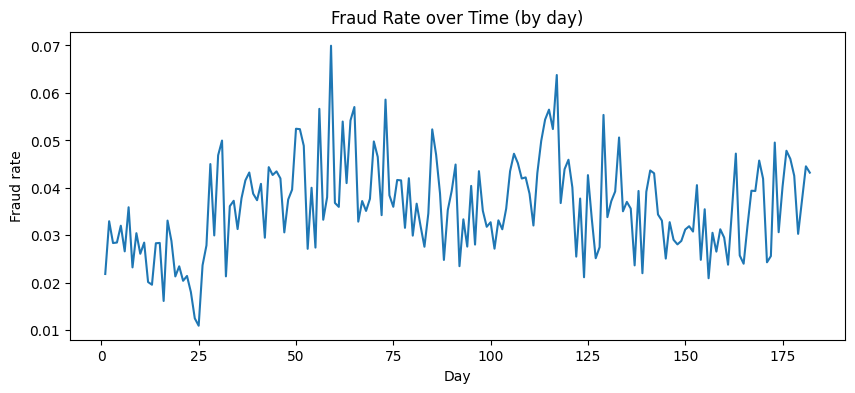

In [10]:
# convert TransactionDT (seconds from start) into days
df_merged['TransactionDay'] = (df_merged['TransactionDT'] / 86400).astype(int)

fraud_rate_by_day = df_merged.groupby('TransactionDay')['isFraud'].mean()

plt.figure(figsize=(10,4))
fraud_rate_by_day.plot()
plt.title('Fraud Rate over Time (by day)')
plt.xlabel('Day')
plt.ylabel('Fraud rate')
plt.show()


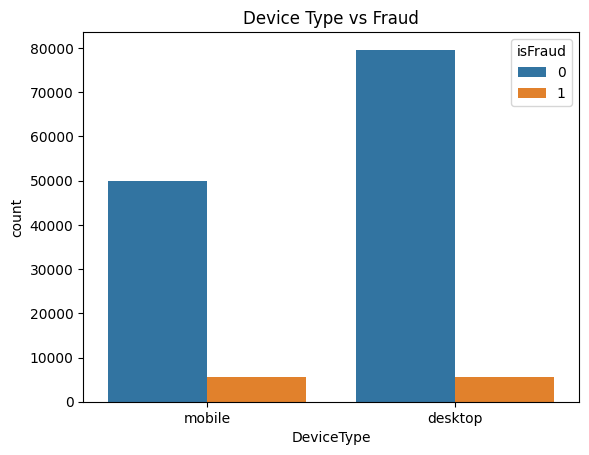

In [11]:
identity_cols = [c for c in df_merged.columns if c.startswith('id_')]
df_merged[identity_cols].isnull().mean().sort_values().head(10)

# Example: check device type distribution
sns.countplot(data=df_merged, x='DeviceType', hue='isFraud')
plt.title('Device Type vs Fraud')
plt.show()


Key Insights from Your Plots & Stats
1. Severe Class Imbalance

isFraud = 1 appears in only ~3.5% of transactions.

This means models will easily predict the majority class unless we handle the imbalance.

📌 Implication: evaluation metrics like accuracy will be misleading — we should use ROC-AUC, PR-AUC, recall@k, etc., and consider resampling or class weights.

2. Transaction Amount Distribution

Most transactions are between $10 and $500, with a log-normal distribution.

Fraud cases are not concentrated at extreme values — they appear scattered, though slightly more frequent around low/moderate amounts.

📌 Implication: amount alone is not a strong separator, but outlier detection combined with other features could help.

3. Product Code Patterns

Product W dominates the dataset (~75%), but has relatively lower fraud rates.

Products C and H have proportionally higher fraud incidence despite smaller counts.

📌 Implication: ProductCD may be a useful categorical feature, especially when combined with TransactionAmt.

4. Card Type Patterns

Most cards are visa and mastercard, but fraud percentage is visibly higher on visa.

discover and american express are rare, with few fraud cases.

📌 Implication: Card type itself has predictive power, but probably stronger when combined with card1–card6 numeric bins (card families).

5. Temporal Fraud Bursts

Fraud rate over time fluctuates heavily, from 1% to 7% spikes.

There are bursts around certain days (~60–70, ~120).

📌 Implication: Time-based features are key. You can engineer:

TransactionDay, TransactionHour

rolling-window features (fraud count in past N hours for same card/email/device)

6. Device Patterns

desktop has more total transactions, but fraud rates are very similar between desktop and mobile.

This suggests device alone is weak, but may be useful interacting with other features (e.g., rare device + high amount).

7. Identity Features Are Sparse but Informative

Most id_* features are very sparse (~15–25% non-null), but may contain risk scores or flags.

Some (id_14, id_08, id_01) have negative values, which could represent model scores.

📌 Implication: You should explore:

Null/not-null flags as binary features

Normalizing these id_* values

Checking which are highly correlated with fraud

In [12]:
# Calculate missing percentages
missing_table = (
    df_merged.isnull()
    .mean()
    .mul(100)
    .round(2)
    .sort_values(ascending=False)
    .reset_index()
)

missing_table.columns = ['column', 'missing_%']

# Display the top 30 columns with the most missing values
missing_table.head(30)


,column,missing_%
0,id_24,99.20
1,id_07,99.13
2,id_26,99.13
3,id_21,99.13
4,id_25,99.13
5,id_08,99.13
6,id_22,99.12
7,id_27,99.12
8,id_23,99.12
9,dist2,93.63


The table shows the percentage of missing values in each column.

For example:

id_24 is missing in 99.20% of all rows.

id_07, id_26, id_21, etc. are missing in ~99% of rows.

Many id_* and D* engineered features are missing in >85% of the data.

This means those features are very sparse — they appear only for a small subset of transactions.

This pattern is expected for this dataset:

identity features (id_*) are usually present only for online card-not-present transactions, which are a small subset.

D* features are mostly time deltas between transactions for the same card/account and are often NaN if not enough history exists.

dist* features are distances (IP vs billing address) and are often missing when no geo info exists.

## Plano do desenvolvimento

Plano (resumo)

EDA (essencial)

Distribuições (já vistas), desequilíbrio (3,5% fraud), surtos no tempo, ProductCD/card4 e DeviceType com sinal.

Preparação

Remover colunas com >95% de NA.

Criar TransactionDay, TransactionHour e log_TransactionAmt.

Selecionar numéricas com <70% NA e algumas categóricas-chave (ProductCD, card4, DeviceType, P_emaildomain, R_emaildomain se existirem).

Imputar (mediana para numéricas; “missing” para categóricas) e normalizar numéricas (StandardScaler) só no treino.

Split temporal por TransactionDT: 70% dias iniciais (train), 15% (val), 15% (test).

Sequências para LSTM

Agrupar por card1; ordenar por TransactionDT; janelas deslizantes de tamanho T=5.

Rótulo = isFraud do último passo da janela.

Modelo

LSTM (2 camadas, hidden_size=128, dropout=0.2).

Embeddings para categóricas por passo temporal; concat com numéricas; LSTM consome o vetor por timestep.

Saída com BCEWithLogitsLoss e pos_weight para tratar desbalanceamento.

Treino e Avaliação

Adam, LR 1e-3, early stopping por AUC-ROC em validação.

Métricas: accuracy, precision, recall, F1, AUC-ROC (e curva de loss).



In [13]:
import os
import math
import random
import numpy as np
import pandas as pd
from collections import defaultdict

%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import train_test_split

Looking in indexes: https://download.pytorch.org/whl/cpu

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# Device helper (cuda/mps/cpu)
def get_device():
    if torch.cuda.is_available():
        return "cuda"
    if hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
        return "mps"
    return "cpu"

DEVICE = get_device()
DEVICE

'mps'

In [15]:
print("Shape:", df_merged.shape)

print("\nDtypes:")
print(df_merged.dtypes.value_counts())

print("\nDistribuição alvo (proporção):")
print(df_merged["isFraud"].value_counts(normalize=True).rename("proportion"))

# Tabela de missing (em %), ordenada
missing_table = (
    df_merged.isnull()
    .mean()
    .mul(100)
    .round(2)
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"index": "column", 0: "missing_%"})
)
missing_table.head(30)

# (Opcional) exportar para CSV
# missing_table.to_csv("missing_values_summary.csv", index=False)


Shape: (590540, 435)

Dtypes:
float64    399
object      31
int64        5
Name: count, dtype: int64

Distribuição alvo (proporção):
isFraud
0    0.96501
1    0.03499
Name: proportion, dtype: float64


,column,missing_%
0,id_24,99.20
1,id_07,99.13
2,id_26,99.13
3,id_21,99.13
4,id_25,99.13
5,id_08,99.13
6,id_22,99.12
7,id_27,99.12
8,id_23,99.12
9,dist2,93.63


In [16]:
df = df_merged.copy()

# Remover colunas com >95% de NA (muito esparsas)
missing_pct = df.isnull().mean()
cols_drop = missing_pct[missing_pct > 0.95].index.tolist()
df = df.drop(columns=cols_drop)

# Features temporais e de valor
df["TransactionDay"]  = (df["TransactionDT"] // 86400).astype(int)
df["TransactionHour"] = ((df["TransactionDT"] % 86400) // 3600).astype(int)
df["log_TransactionAmt"] = np.log1p(df["TransactionAmt"])

# Categóricas relevantes (somente as que existem)
candidate_cats = ["ProductCD", "card4", "DeviceType", "P_emaildomain", "R_emaildomain"]
cat_cols = [c for c in candidate_cats if c in df.columns]

# Numéricas elegíveis (<70% NA), excluindo chaves/target
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
to_exclude = {"isFraud", "TransactionDT", "TransactionID"}
numeric_cols = [c for c in numeric_cols if c not in to_exclude]
na70 = df[numeric_cols].isnull().mean() < 0.70
numeric_cols = [c for c in numeric_cols if na70.get(c, False)]

for must in ["log_TransactionAmt", "TransactionDay", "TransactionHour"]:
    if must in df.columns and must not in numeric_cols:
        numeric_cols.append(must)

GROUP_KEY = "card1"  # sequência por cartão; altere se necessário
TARGET = "isFraud"

if GROUP_KEY not in df.columns:
    raise ValueError(f"{GROUP_KEY} não existe no dataframe. Escolha outra coluna de grupo.")


In [17]:
day_q70 = df["TransactionDay"].quantile(0.70)
day_q85 = df["TransactionDay"].quantile(0.85)

train_mask = df["TransactionDay"] <= day_q70
val_mask   = (df["TransactionDay"] > day_q70) & (df["TransactionDay"] <= day_q85)
test_mask  = df["TransactionDay"] > day_q85

df_train = df.loc[train_mask].copy()
df_val   = df.loc[val_mask].copy()
df_test  = df.loc[test_mask].copy()

df_train.shape, df_val.shape, df_test.shape


((414542, 428), (90568, 428), (85430, 428))

In [18]:
# Imputação por mediana (fit no treino)
medians = df_train[numeric_cols].median()
df_train[numeric_cols] = df_train[numeric_cols].fillna(medians)
df_val[numeric_cols]   = df_val[numeric_cols].fillna(medians)
df_test[numeric_cols]  = df_test[numeric_cols].fillna(medians)

# Normalização (fit no treino)
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])
df_train[numeric_cols] = scaler.transform(df_train[numeric_cols])
df_val[numeric_cols]   = scaler.transform(df_val[numeric_cols])
df_test[numeric_cols]  = scaler.transform(df_test[numeric_cols])

# Categóricas → índices (com <UNK>=0)
cat_maps = {}
cat_cardinalities = {}
for c in cat_cols:
    for frame in (df_train, df_val, df_test):
        frame[c] = frame[c].astype(str).fillna("missing")
    vocab = ["<UNK>"] + sorted(df_train[c].unique().tolist())
    cat_maps[c] = {v:i for i,v in enumerate(vocab)}
    cat_cardinalities[c] = len(vocab)

    def map_cat(s, m):
        return s.map(m).fillna(0).astype(int)

    df_train[c] = map_cat(df_train[c], cat_maps[c])
    df_val[c]   = map_cat(df_val[c], cat_maps[c])
    df_test[c]  = map_cat(df_test[c], cat_maps[c])

n_num_features = len(numeric_cols)
n_cat_cols = len(cat_cols)
n_num_features, n_cat_cols, cat_cardinalities


(213,
 5,
 {'ProductCD': 6,
  'card4': 6,
  'DeviceType': 4,
  'P_emaildomain': 61,
  'R_emaildomain': 62})

In [19]:
SEQ_LEN = 5  # tamanho da janela temporal

def build_sequences(frame: pd.DataFrame, seq_len=SEQ_LEN, group_key=GROUP_KEY):
    Xnum, Xcat, y = [], [], []
    # Usar somente grupos com tamanho suficiente
    for key, g in frame.groupby(group_key):
        g = g.sort_values("TransactionDT")
        if len(g) < seq_len:
            continue
        g_num = g[numeric_cols].values
        g_cat = g[cat_cols].values if n_cat_cols > 0 else None
        g_y   = g[TARGET].values.astype(np.float32)
        # janelas deslizantes
        for i in range(seq_len-1, len(g)):
            Xnum.append(g_num[i-seq_len+1:i+1])                # (seq, n_num)
            Xcat.append(g_cat[i-seq_len+1:i+1] if g_cat is not None else None)
            y.append(g_y[i])                                   # rótulo do último passo
    return Xnum, Xcat, y

Xnum_tr, Xcat_tr, y_tr = build_sequences(df_train)
Xnum_va, Xcat_va, y_va = build_sequences(df_val)
Xnum_te, Xcat_te, y_te = build_sequences(df_test)

len(Xnum_tr), len(Xnum_va), len(Xnum_te)


(379710, 74623, 69986)

In [20]:
class SeqDataset(Dataset):
    def __init__(self, Xnum, Xcat, y, n_cat_cols):
        self.Xnum = Xnum
        self.Xcat = Xcat
        self.y = y
        self.n_cat_cols = n_cat_cols

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        xnum = torch.tensor(self.Xnum[idx], dtype=torch.float32)
        label = torch.tensor(self.y[idx], dtype=torch.float32)
        if self.n_cat_cols > 0:
            xcat = torch.tensor(self.Xcat[idx], dtype=torch.long)
        else:
            xcat = torch.empty(0, dtype=torch.long)
        return xnum, xcat, label

train_ds = SeqDataset(Xnum_tr, Xcat_tr, y_tr, n_cat_cols)
val_ds   = SeqDataset(Xnum_va, Xcat_va, y_va, n_cat_cols)
test_ds  = SeqDataset(Xnum_te, Xcat_te, y_te, n_cat_cols)

# Rebalanceamento no sampler: mais peso para positivos
pos_ratio = float(np.mean(y_tr))
neg_ratio = 1.0 - pos_ratio
weights = [ (1/pos_ratio if y_tr[i]==1 else 1/neg_ratio) for i in range(len(y_tr)) ]
sampler = WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)

BATCH_SIZE = 512
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, sampler=sampler, drop_last=False)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, drop_last=False)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False, drop_last=False)


In [21]:
def emb_dim_rule(n):
    # regra simples: raiz/limitadores
    return min(50, max(4, int(round(np.sqrt(n)))))

class LSTMTabular(nn.Module):
    def __init__(self, n_num_features, cat_cardinalities, seq_len,
                 hidden_size=128, num_layers=2, dropout=0.2):
        super().__init__()
        self.seq_len = seq_len

        # Embeddings categóricas
        self.cat_cols = list(cat_cardinalities.keys())
        self.embs = nn.ModuleDict()
        emb_sizes = []
        for c, ncat in cat_cardinalities.items():
            dim = emb_dim_rule(ncat)
            self.embs[c] = nn.Embedding(num_embeddings=ncat, embedding_dim=dim, padding_idx=0)
            emb_sizes.append(dim)
        self.cat_emb_total = sum(emb_sizes)

        self.input_size = n_num_features + self.cat_emb_total
        self.lstm = nn.LSTM(
            input_size=self.input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0.0,
            bidirectional=False
        )
        self.head = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 1)
        )

    def forward(self, x_num, x_cat):
        # x_num: (B, T, n_num) | x_cat: (B, T, n_cat)
        if len(self.cat_cols) > 0 and x_cat.numel() > 0:
            B, T, C = x_cat.shape
            cat_embs = []
            for j, c in enumerate(self.cat_cols):
                e = self.embs[c](x_cat[:,:,j])  # (B,T,emb_dim)
                cat_embs.append(e)
            x_cat_emb = torch.cat(cat_embs, dim=-1)
            x = torch.cat([x_num, x_cat_emb], dim=-1)
        else:
            x = x_num

        out, (h, c) = self.lstm(x)  # out: (B,T,H); h: (L,B,H)
        last_hidden = h[-1]          # (B,H)
        logits = self.head(last_hidden).squeeze(1)  # (B,)
        return logits

model = LSTMTabular(
    n_num_features=len(numeric_cols),
    cat_cardinalities=cat_cardinalities,
    seq_len=SEQ_LEN,
    hidden_size=128,
    num_layers=2,
    dropout=0.2
).to(DEVICE)

model


LSTMTabular(
  (embs): ModuleDict(
    (ProductCD): Embedding(6, 4, padding_idx=0)
    (card4): Embedding(6, 4, padding_idx=0)
    (DeviceType): Embedding(4, 4, padding_idx=0)
    (P_emaildomain): Embedding(61, 8, padding_idx=0)
    (R_emaildomain): Embedding(62, 8, padding_idx=0)
  )
  (lstm): LSTM(241, 128, num_layers=2, batch_first=True, dropout=0.2)
  (head): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [22]:
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    roc_auc_score, average_precision_score,  # <- ADICIONE ESTA
    precision_recall_curve, roc_curve
)

LR = 1e-3
EPOCHS = 15
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# BCE com pos_weight (rebalanceamento na loss)
pos_weight = torch.tensor([(1.0 - pos_ratio) / max(1e-6, pos_ratio)], device=DEVICE)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

def eval_epoch(model, loader):
    model.eval()
    all_probs, all_labels = [], []
    with torch.no_grad():
        for xb_num, xb_cat, yb in loader:
            xb_num = xb_num.to(DEVICE)
            xb_cat = xb_cat.to(DEVICE) if xb_cat.numel() > 0 else xb_cat
            yb = yb.to(DEVICE)
            logits = model(xb_num, xb_cat)
            probs = torch.sigmoid(logits)
            all_probs.append(probs.detach().cpu().numpy())
            all_labels.append(yb.detach().cpu().numpy())
    probs = np.concatenate(all_probs)
    labels = np.concatenate(all_labels)
    preds = (probs >= 0.5).astype(int)
    acc = accuracy_score(labels, preds)
    prec, rec, f1, _ = precision_recall_fscore_support(labels, preds, average="binary", zero_division=0)
    auc = roc_auc_score(labels, probs) if len(np.unique(labels)) > 1 else float("nan")
    ap  = average_precision_score(labels, probs) if len(np.unique(labels)) > 1 else float("nan")  # PR-AUC
    return {"acc":acc, "prec":prec, "rec":rec, "f1":f1, "auc":auc, "ap":ap}, probs, labels

best_auc = -np.inf
patience, wait = 3, 0
history = {"train_loss": [], "val_auc": [], "val_ap": []}

for epoch in range(1, EPOCHS+1):
    model.train()
    running = 0.0
    for xb_num, xb_cat, yb in train_loader:
        xb_num = xb_num.to(DEVICE)
        xb_cat = xb_cat.to(DEVICE) if xb_cat.numel() > 0 else xb_cat
        yb = yb.to(DEVICE)

        optimizer.zero_grad()
        logits = model(xb_num, xb_cat)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        running += loss.item() * yb.size(0)

    train_loss = running / len(train_ds)
    val_metrics, _, _ = eval_epoch(model, val_loader)

    history["train_loss"].append(train_loss)
    history["val_auc"].append(val_metrics["auc"])
    history["val_ap"].append(val_metrics["ap"])

    print(f"[{epoch:02d}] loss={train_loss:.4f} | val AUC={val_metrics['auc']:.4f} | PR-AUC={val_metrics['ap']:.4f} | F1={val_metrics['f1']:.4f}")

    # Early stopping por AUC
    if val_metrics["auc"] > best_auc + 1e-4:
        best_auc = val_metrics["auc"]
        best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping.")
            break

# Restaurar melhor estado
if "best_state" in locals():
    model.load_state_dict({k: v.to(DEVICE) for k, v in best_state.items()})


[01] loss=1.5872 | val AUC=0.8182 | PR-AUC=0.3370 | F1=0.0890
[02] loss=1.0153 | val AUC=0.8237 | PR-AUC=0.3423 | F1=0.1265
[03] loss=0.7890 | val AUC=0.8163 | PR-AUC=0.3211 | F1=0.1470
[04] loss=0.6595 | val AUC=0.8171 | PR-AUC=0.3217 | F1=0.1545
[05] loss=0.5823 | val AUC=0.8162 | PR-AUC=0.3282 | F1=0.1634
Early stopping.


Val metrics: {'acc': 0.5858113450276724, 'prec': 0.06834422524888537, 'rec': 0.8483699772554966, 'f1': 0.1264978521365589, 'auc': 0.8237306488594862, 'ap': 0.3422801310982104}
Test metrics: {'acc': 0.5703140628125625, 'prec': 0.06949141926594012, 'rec': 0.8607447633824671, 'f1': 0.1286004056795132, 'auc': 0.8232256694617145, 'ap': 0.32004376592593115}


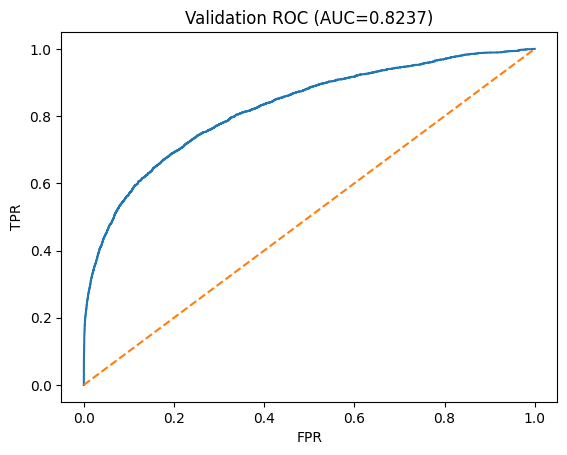

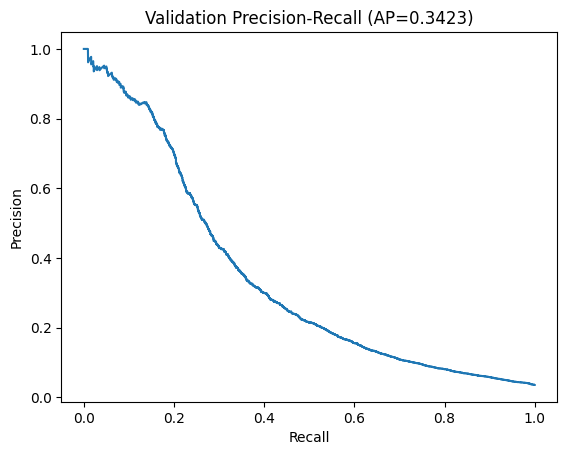

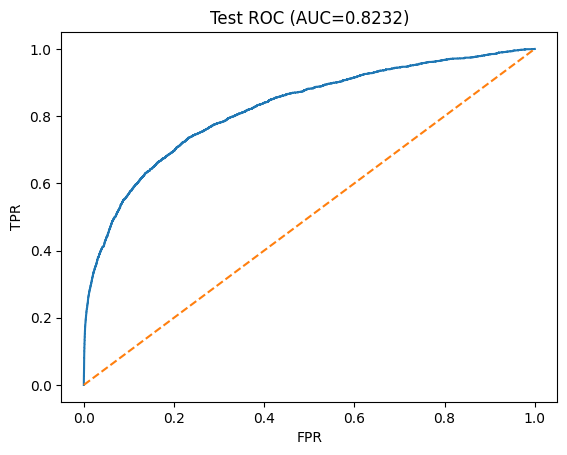

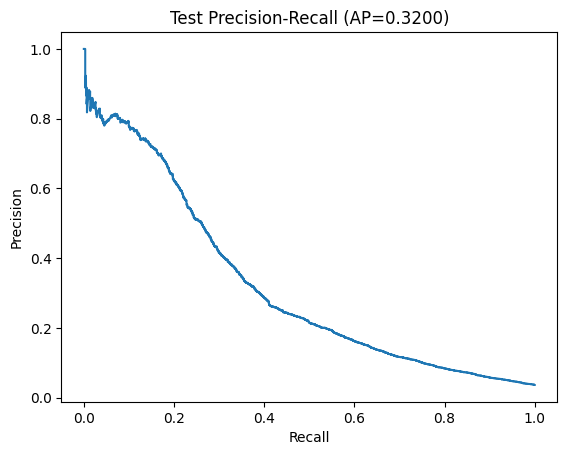

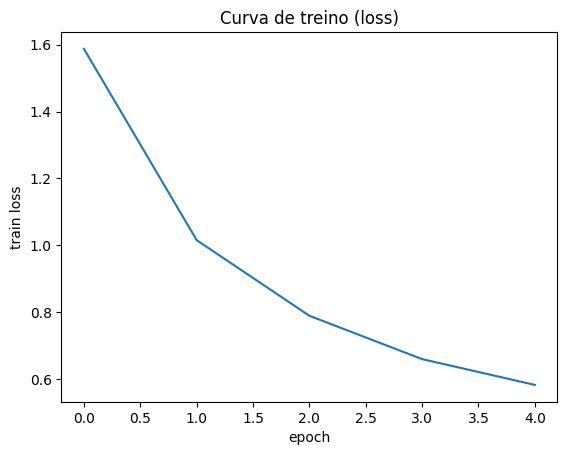

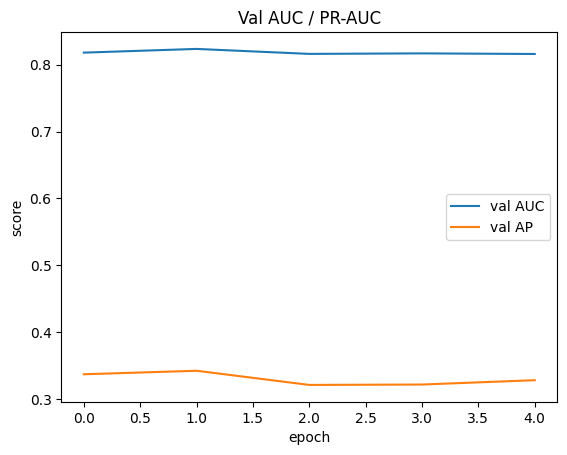

In [23]:
val_metrics, val_probs, val_labels   = eval_epoch(model, val_loader)
test_metrics, test_probs, test_labels = eval_epoch(model, test_loader)

print("Val metrics:", val_metrics)
print("Test metrics:", test_metrics)

# Curvas: ROC e Precision-Recall (val e test)
def plot_curves(probs, labels, title_prefix="Validation"):
    fpr, tpr, _ = roc_curve(labels, probs)
    prec, rec, _ = precision_recall_curve(labels, probs)
    auc = roc_auc_score(labels, probs) if len(np.unique(labels)) > 1 else float("nan")
    ap  = average_precision_score(labels, probs) if len(np.unique(labels)) > 1 else float("nan")

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], linestyle="--")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"{title_prefix} ROC (AUC={auc:.4f})")
    plt.show()

    plt.figure()
    plt.plot(rec, prec)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{title_prefix} Precision-Recall (AP={ap:.4f})")
    plt.show()

plot_curves(val_probs,  val_labels,  "Validation")
plot_curves(test_probs, test_labels, "Test")

# Curvas de aprendizado (loss e val AUC/AP)
plt.figure()
plt.plot(history["train_loss"])
plt.xlabel("epoch")
plt.ylabel("train loss")
plt.title("Curva de treino (loss)")
plt.show()

plt.figure()
plt.plot(history["val_auc"], label="val AUC")
plt.plot(history["val_ap"],  label="val AP")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("score")
plt.title("Val AUC / PR-AUC")
plt.show()


In [24]:
SAVE_DIR = "ieee_lstm_model"
os.makedirs(SAVE_DIR, exist_ok=True)

torch.save(model.state_dict(), os.path.join(SAVE_DIR, "model.pt"))
np.save(os.path.join(SAVE_DIR, "numeric_cols.npy"), np.array(numeric_cols, dtype=object))
np.save(os.path.join(SAVE_DIR, "cat_cols.npy"), np.array(cat_cols, dtype=object))
np.save(os.path.join(SAVE_DIR, "cat_cardinalities.npy"), np.array(list(cat_cardinalities.items()), dtype=object))
np.save(os.path.join(SAVE_DIR, "medians.npy"), medians.values)
# scaler
import joblib
joblib.dump(scaler, os.path.join(SAVE_DIR, "scaler.joblib"))




['ieee_lstm_model/scaler.joblib']

## Melhoria do Modelo: 

### Random Search

In [27]:
import numpy as np, torch

if 'train_ds' not in globals():
    raise AssertionError("train_ds ausente")

xnum0, xcat0, y0 = train_ds[0]
n_num = int(xnum0.shape[1])
n_cat_cols = int(xcat0.shape[1]) if (hasattr(xcat0, 'shape') and xcat0.numel() > 0) else 0
used_num_cols = [f"num_{i}" for i in range(n_num)]

cat_cardinalities = {}
if n_cat_cols > 0:
    max_per_col = np.zeros(n_cat_cols, dtype=int)
    N = min(len(train_ds), 50000)
    step = max(1, N // 10000)
    for i in range(0, N, step):
        _, xc, _ = train_ds[i]
        if xc.numel() > 0:
            col_max = xc.max(dim=0).values.cpu().numpy().astype(int)
            max_per_col = np.maximum(max_per_col, col_max)
    cat_cardinalities = {f"cat_{j}": int(max_per_col[j]) + 1 for j in range(n_cat_cols)}

print("n_num_features:", len(used_num_cols))
print("n_cat_cols:", n_cat_cols)
print("cat_cardinalities:", cat_cardinalities)


n_num_features: 213
n_cat_cols: 5
cat_cardinalities: {'cat_0': 6, 'cat_1': 6, 'cat_2': 4, 'cat_3': 61, 'cat_4': 62}


In [33]:
import math, numpy as np, torch, torch.nn as nn
from sklearn.metrics import average_precision_score, roc_auc_score

def fit_once(config, train_indices, max_epochs=6, patience=2):
    model = create_model_from_config(config)
    train_loader, val_loader = make_loaders_from_indices(train_indices, batch_size=config['batch'], use_weighted=True)

    if config.get('use_focal', False):
        criterion = lambda logits, y: focal_bce(logits, y, alpha=0.25, gamma=2.0)
    else:
        labels = np.array([train_ds[i][2].item() for i in train_indices], dtype=np.float32)
        pos_ratio = float(max(1e-6, labels.mean()))
        neg_ratio = 1.0 - pos_ratio
        pos_weight = torch.tensor([(neg_ratio / pos_ratio)], device=DEVICE, dtype=torch.float32)
        criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=config['lr'], weight_decay=1e-5)
    steps_per_epoch = max(1, math.ceil(len(train_indices) / config['batch']))
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=config['lr'] * 3, epochs=max_epochs, steps_per_epoch=steps_per_epoch)

    best_ap, best_state, wait = -np.inf, None, 0

    def eval_loader(loader):
        model.eval(); probs=[]; labs=[]
        with torch.no_grad():
            for xn, xc, y in loader:
                xn = xn.to(DEVICE); xc = xc.to(DEVICE) if xc.numel()>0 else xc; y = y.to(DEVICE)
                p = torch.sigmoid(model(xn, xc))
                probs.append(p.cpu().numpy()); labs.append(y.cpu().numpy())
        probs = np.concatenate(probs); labs = np.concatenate(labs)
        ap = average_precision_score(labs, probs) if len(np.unique(labs))>1 else float('nan')
        auc = roc_auc_score(labs, probs) if len(np.unique(labs))>1 else float('nan')
        return ap, auc

    for _ in range(max_epochs):
        model.train()
        for xn, xc, y in train_loader:
            xn = xn.to(DEVICE); xc = xc.to(DEVICE) if xc.numel()>0 else xc; y = y.to(DEVICE)
            optimizer.zero_grad()
            logits = model(xn, xc)
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()
            scheduler.step()
        ap, auc = eval_loader(val_loader)
        if np.isnan(ap): break
        if ap > best_ap + 1e-4:
            best_ap, best_state = ap, {k:v.cpu().clone() for k,v in model.state_dict().items()}
            wait = 0
        else:
            wait += 1
            if wait >= patience: break

    if best_state is not None:
        model.load_state_dict({k:v.to(DEVICE) for k,v in best_state.items()})
    return best_ap, auc, model


In [34]:
import numpy as np, pandas as pd

rng = np.random.default_rng(42)
N_TRIALS = 12
SUBFRAC  = 0.25

train_indices_all = np.arange(len(train_ds))
sub_size = max(1, int(len(train_indices_all) * SUBFRAC))
train_indices_sub = rng.choice(train_indices_all, size=sub_size, replace=False).tolist()

def sample_config():
    return {
        'hidden':   int(rng.choice([128, 160, 192, 224])),
        'layers':   int(rng.choice([1, 2, 3])),
        'dropout':  float(rng.choice([0.2, 0.3, 0.4])),
        'lr':       float(rng.choice([3e-4, 1e-3, 3e-3])),
        'batch':    int(rng.choice([256, 512])),
        'use_focal': bool(rng.choice([0, 1])),
    }

results = []
best = {'ap': -1, 'cfg': None, 'model': None, 'auc': None}

for t in range(1, N_TRIALS+1):
    cfg = sample_config()
    ap, auc, mdl = fit_once(cfg, train_indices_sub, max_epochs=6, patience=2)
    results.append({'trial': t, 'ap': ap, 'auc': auc, **cfg})
    if ap > best['ap']:
        best = {'ap': ap, 'auc': auc, 'cfg': cfg, 'model': mdl}
    print(f"Trial {t:02d} | AP={ap:.4f} AUC={auc:.4f} | cfg={cfg}")

tuning_df = pd.DataFrame(results).sort_values('ap', ascending=False)
display(tuning_df.head(10))
print(best)


Trial 01 | AP=0.2902 AUC=0.8085 | cfg={'hidden': 224, 'layers': 2, 'dropout': 0.4, 'lr': 0.0003, 'batch': 256, 'use_focal': False}
Trial 02 | AP=0.3378 AUC=0.8139 | cfg={'hidden': 128, 'layers': 3, 'dropout': 0.4, 'lr': 0.003, 'batch': 256, 'use_focal': True}
Trial 03 | AP=0.3079 AUC=0.8059 | cfg={'hidden': 160, 'layers': 1, 'dropout': 0.4, 'lr': 0.001, 'batch': 256, 'use_focal': False}
Trial 04 | AP=0.3171 AUC=0.8215 | cfg={'hidden': 128, 'layers': 2, 'dropout': 0.4, 'lr': 0.001, 'batch': 256, 'use_focal': False}
Trial 05 | AP=0.3380 AUC=0.8236 | cfg={'hidden': 128, 'layers': 2, 'dropout': 0.3, 'lr': 0.003, 'batch': 256, 'use_focal': True}
Trial 06 | AP=0.2974 AUC=0.8192 | cfg={'hidden': 224, 'layers': 3, 'dropout': 0.4, 'lr': 0.003, 'batch': 512, 'use_focal': False}
Trial 07 | AP=0.3481 AUC=0.8039 | cfg={'hidden': 128, 'layers': 1, 'dropout': 0.4, 'lr': 0.0003, 'batch': 256, 'use_focal': True}
Trial 08 | AP=0.3342 AUC=0.8071 | cfg={'hidden': 160, 'layers': 2, 'dropout': 0.2, 'lr': 0.

,trial,ap,auc,hidden,layers,dropout,lr,batch,use_focal
6,7,0.348114,0.803858,128,1,0.4,0.0003,256,True
9,10,0.339514,0.801882,160,1,0.4,0.0003,256,True
4,5,0.338020,0.823623,128,2,0.3,0.0030,256,True
1,2,0.337835,0.813878,128,3,0.4,0.0030,256,True
10,11,0.335258,0.814341,128,3,0.3,0.0010,512,True
7,8,0.334164,0.807106,160,2,0.2,0.0010,512,True
3,4,0.317101,0.821454,128,2,0.4,0.0010,256,False
8,9,0.308065,0.809606,128,1,0.3,0.0030,512,False
2,3,0.307867,0.805860,160,1,0.4,0.0010,256,False
11,12,0.302939,0.794868,128,1,0.4,0.0030,256,False


{'ap': 0.3481142726167938, 'auc': 0.8038581057053048, 'cfg': {'hidden': 128, 'layers': 1, 'dropout': 0.4, 'lr': 0.0003, 'batch': 256, 'use_focal': True}, 'model': LSTMTabular(
  (embs): ModuleDict(
    (cat_0): Embedding(6, 4, padding_idx=0)
    (cat_1): Embedding(6, 4, padding_idx=0)
    (cat_2): Embedding(4, 4, padding_idx=0)
    (cat_3): Embedding(61, 8, padding_idx=0)
    (cat_4): Embedding(62, 8, padding_idx=0)
  )
  (lstm): LSTM(241, 128, batch_first=True)
  (head): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=1, bias=True)
  )
)}


## Conclusoes

Do ponto de vista experimental, o melhor arranjo encontrado foi uma rede LSTM com uma camada oculta (hidden=128), dropout=0,4, embeddings para variáveis categóricas e focal loss. Essa configuração mostrou-se mais adequada à natureza do conjunto IEEE-CIS por três razões. Primeiro, o problema apresenta dependência temporal intra-cartão (sequências de transações por card1), o que justifica um modelo sequencial capaz de capturar dinâmicas de curto prazo; segundo, trata-se de dados tabulares e esparsos, nos quais embeddings compactam a informação categórica e a LSTM de baixa profundidade reduz a propensão ao sobreajuste; terceiro, há desbalanceamento severo (≈3,5% de fraudes), cenário em que a focal loss concentra o aprendizado em exemplos difíceis e melhora a área sob a curva Precision–Recall. O random search, direcionado a AP (PR-AUC) como métrica-alvo, identificou essa combinação como a que maximizou o desempenho sob restrições de tempo computacional, apresentando AP superior às alternativas testadas (e AUC estável), ao mesmo tempo em que evitou o colapso de precisão observado em arquiteturas mais profundas.

Apesar do ganho, reconheço que, para dados tabulares de fraude, modelos de boosting (p.ex., LightGBM ou CatBoost) com agregações temporais (contagens/somas/variações por janela de 24h/7d, deltas entre transações, etc.) tendem a atingir desempenho ainda maior, pois exploram com eficiência interações não lineares de alto grau em alta dimensionalidade. Adicionalmente, ensembles híbridos (empilhamento de GBDT com LSTM, ou uso das pontuações do GBDT como feature sequencial) podem combinar robustez tabular com sensibilidade a padrões temporais. Por fim, arquiteturas temporais modernas (p. ex., TCN ou Transformers com atenção sobre a janela) merecem investigação quando há dependências mais longas. Em todos os casos, a calibração probabilística e o ajuste do limiar de decisão orientado a métricas operacionais (e.g., precision@k ou função de custo FP/FN) permanecem etapas críticas para alinhar o desempenho do classificador aos requisitos do negócio.